In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode

#options
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Trenes - Transporte de pasajeros

In [35]:
pasajeros = pd.read_csv("https://servicios.transporte.gob.ar/gobierno_abierto/descargar.php?t=trenes&d=pasajeros", sep=";", encoding="UTF-8")
pasajeros

,mes,linea,estacion,cantidad
0,12/2018,belgranosur,Aldo Bonzi,2967
1,12/2018,belgranosur,Buenos Aires,8
2,12/2018,belgranosur,Castello,63065
3,12/2018,belgranosur,Castillo,32909
4,12/2018,belgranosur,Eva Duarte,43321
...,...,...,...,...
4511,01/2018,sarmiento,Ramos Mejía,96526
4512,01/2018,sarmiento,S.A de Padua,206342
4513,01/2019,sarmiento,S.A de Padua,243244
4514,01/2018,sarmiento,Villa Luro,109364


## DATA CLEANING

In [36]:
#DEJAMOS TODO EN MAYUS - NOMBRES DE COLUMNAS
pasajeros.columns = pasajeros.columns.str.upper()

In [37]:
#QUITAMOS TILDES Y DEJAMOS TODO EN MAYUS - VALORES
pasajeros[["LINEA", "ESTACION"]]= pasajeros[["LINEA", "ESTACION"]].applymap(lambda x: str.upper(unidecode(x)))

In [40]:
#DAMOS FORMATO A LA FECHA
pasajeros["FECHA"] =  pd.to_datetime(pasajeros["MES"])

In [41]:
#CORREGIMOS UN PROBLEMA DE ESPACIO
pasajeros = pasajeros.replace({"BELGRANOSUR":"BELGRANO SUR", "BELGRANONORTE":"BELGRANO NORTE", "SANMARTIN": "SAN MARTIN"})

In [42]:
#ASUMIMOS EL MES COMO LA REFERENCIA DE ORDEN TEMPORAL
pasajeros = pasajeros.sort_values("FECHA").reset_index(drop=True)

**Nota:** Parece que fueron agregando datos sin tomar en cuenta la referencia temporal, por eso la lo reordenamos

In [43]:
pasajeros = pasajeros.drop(columns="MES")
pasajeros = pasajeros.rename(columns={"CANTIDAD":"TOTAL"})
pasajeros.to_csv("./data/07-TRENES-PASAJEROS.csv", index_label="INDEX")

In [44]:
pasajeros.dtypes

LINEA               object
ESTACION            object
TOTAL                int64
FECHA       datetime64[ns]
dtype: object

# INSPECCION VISUAL

In [45]:
pasajeros_mes_linea = pasajeros.groupby(["FECHA", "LINEA"]).aggregate("sum").unstack()

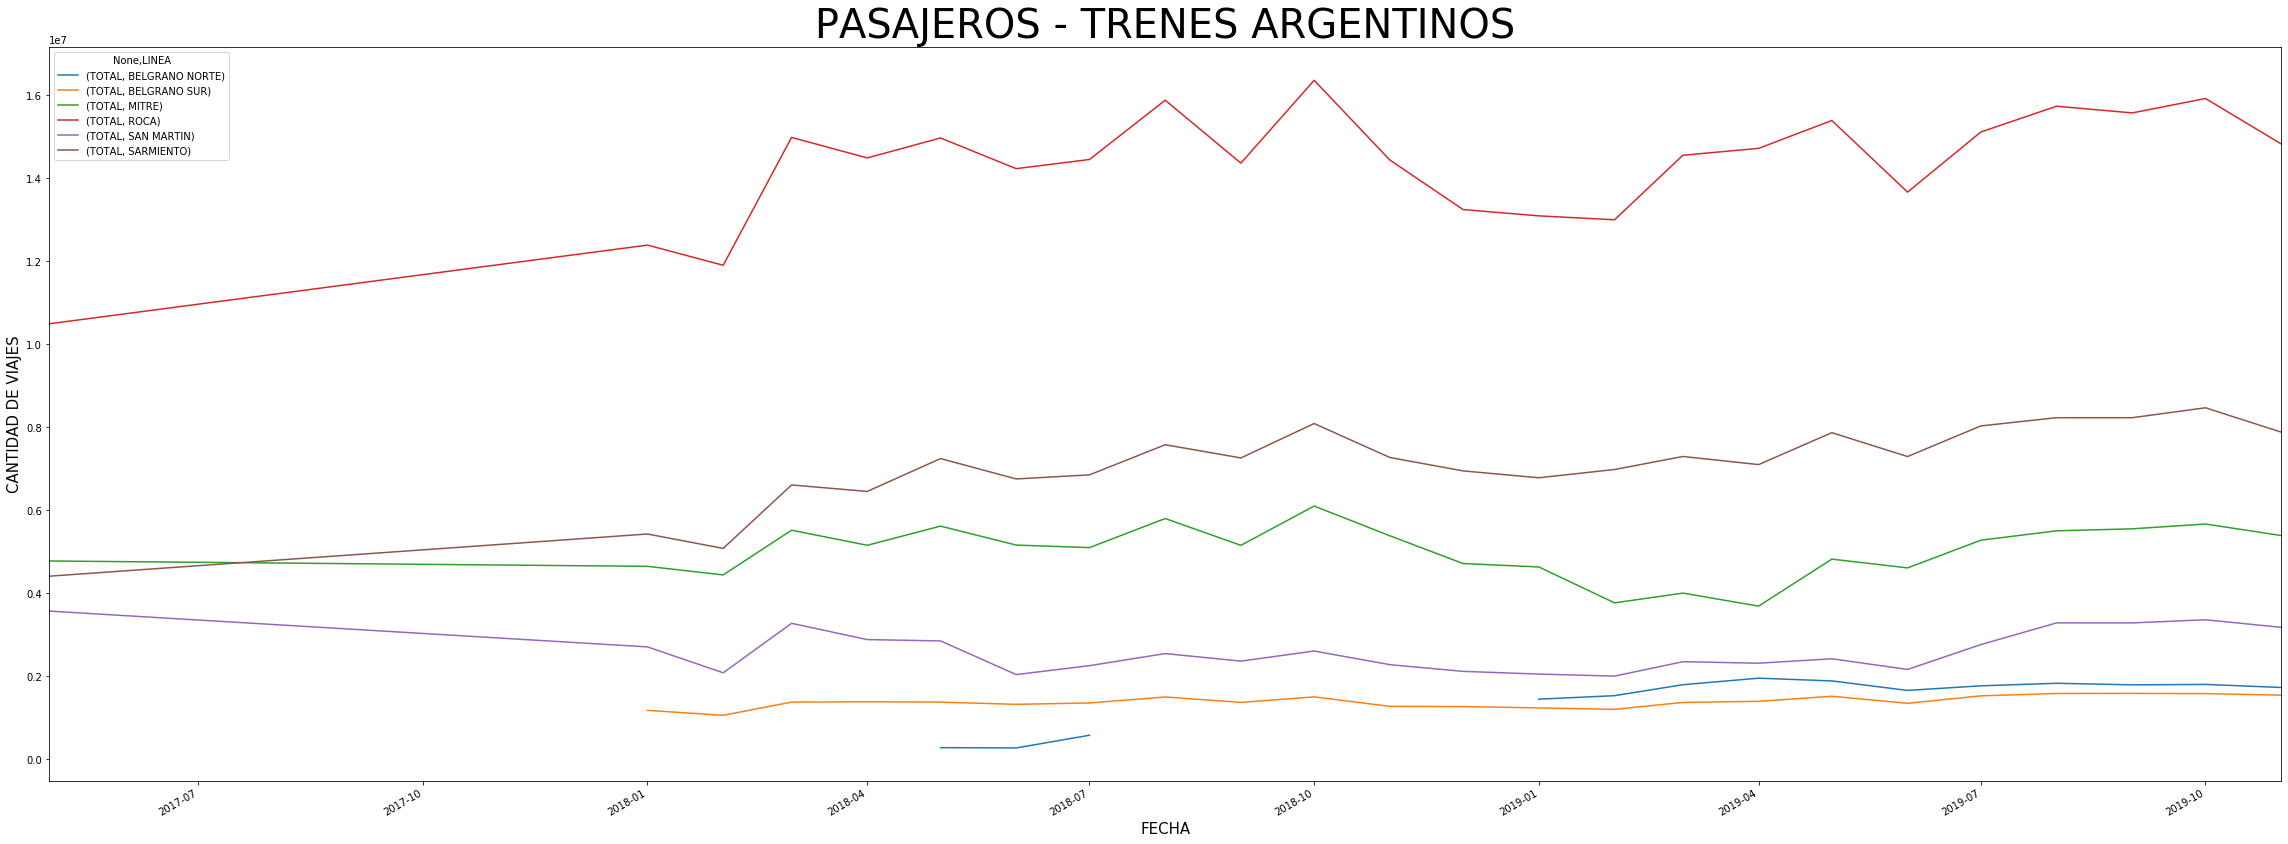

In [46]:
#PARAMETRO
fig, ax = plt.subplots(figsize=(40,15))

#AGRUPAMOS
pasajeros_mes_linea.plot(ax=ax)

#ETIQUETAS
ax.set_title("PASAJEROS - TRENES ARGENTINOS", size=40)
plt.xlabel("FECHA", size=15)
plt.ylabel("CANTIDAD DE VIAJES", size=15)

plt.show();

Pese que habría que preprocesar los datos para emitir un resultado riguroso, del gráfico podemos observar varias cosas:

1. Hay una marcada diferencia en el comprtamiento de todas las redes en el año `2018`.
2. La línea de `BELGRANO` tiene un comportamiento bastante diferente y las otras se parecen entre sí, tomando un lenguaje de física moderna y ondas, diria que "están en fase". 
3. La línea `GENERAL ROCA` a transportado significativamente más personas desde sus inicios.
4. Exeptuando las lineas de `GENERAL ROCA` las otras parecen oscilar al rededor de un valor medio.
5. ¿Estuvieron sin servicio las líneas de `BELGRANO`?